<a href="https://colab.research.google.com/github/spberry4/Air_Quality/blob/main/Air_Pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sodapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1


In [3]:
import plotly.express as px
import pandas as pd
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from sodapy import Socrata
import glob
import folium

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
files = glob.glob('/content/drive/MyDrive/Data/AQI/*.csv', 
                   recursive = True)
for file in files:
    print(file)

/content/drive/MyDrive/Data/AQI/ad_viz_plotvalPM2.5_data_2022.csv
/content/drive/MyDrive/Data/AQI/ad_viz_plotvalPM2.5_data_2021.csv
/content/drive/MyDrive/Data/AQI/ad_viz_plotval_data_pm10_2022.csv
/content/drive/MyDrive/Data/AQI/ad_viz_plotval_data_PM10_2021.csv
/content/drive/MyDrive/Data/AQI/ad_viz_plotval_data_ozone_2022.csv
/content/drive/MyDrive/Data/AQI/ad_viz_plotval_data_2021_ozone.csv


In [6]:
# create empty list to store dataframes
li = []

for f in files:
    # read in csv
    temp_df = pd.read_csv(f)
    # append df to list
    li.append(temp_df)
    print(f'Successfully created dataframe for {f} with shape {temp_df.shape}')

Successfully created dataframe for /content/drive/MyDrive/Data/AQI/ad_viz_plotvalPM2.5_data_2022.csv with shape (5792, 20)
Successfully created dataframe for /content/drive/MyDrive/Data/AQI/ad_viz_plotvalPM2.5_data_2021.csv with shape (4924, 20)
Successfully created dataframe for /content/drive/MyDrive/Data/AQI/ad_viz_plotval_data_pm10_2022.csv with shape (2148, 20)
Successfully created dataframe for /content/drive/MyDrive/Data/AQI/ad_viz_plotval_data_PM10_2021.csv with shape (1065, 20)
Successfully created dataframe for /content/drive/MyDrive/Data/AQI/ad_viz_plotval_data_ozone_2022.csv with shape (2885, 20)
Successfully created dataframe for /content/drive/MyDrive/Data/AQI/ad_viz_plotval_data_2021_ozone.csv with shape (2806, 20)


In [7]:
# concatenate our list of dataframes into one!
df = pd.concat(li, axis=0)
print(df.shape)
df.head()

(19620, 22)


,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,Daily Mean PM10 Concentration,Daily Max 8-hour Ozone Concentration
0,01/01/2022,AQS,490352005,1,4.3,ug/m3 LC,18,Copper View,1,100.0,...,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167,NaN,NaN
1,01/02/2022,AQS,490352005,1,8.5,ug/m3 LC,35,Copper View,1,100.0,...,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167,NaN,NaN
2,01/03/2022,AQS,490352005,1,16.5,ug/m3 LC,60,Copper View,1,100.0,...,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167,NaN,NaN
3,01/04/2022,AQS,490352005,1,5.0,ug/m3 LC,21,Copper View,1,100.0,...,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167,NaN,NaN
4,01/05/2022,AQS,490352005,1,5.2,ug/m3 LC,22,Copper View,1,100.0,...,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19620 entries, 0 to 2805
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  19620 non-null  object 
 1   Source                                19620 non-null  object 
 2   Site ID                               19620 non-null  int64  
 3   POC                                   19620 non-null  int64  
 4   Daily Mean PM2.5 Concentration        10716 non-null  float64
 5   UNITS                                 19620 non-null  object 
 6   DAILY_AQI_VALUE                       19620 non-null  int64  
 7   Site Name                             19620 non-null  object 
 8   DAILY_OBS_COUNT                       19620 non-null  int64  
 9   PERCENT_COMPLETE                      19620 non-null  float64
 10  AQS_PARAMETER_CODE                    19620 non-null  int64  
 11  AQS_PARAMETER_DE

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Site ID,19620.0,4.903530e+08,445.818588,4.903520e+08,4.903530e+08,4.903530e+08,4.903530e+08,4.903540e+08
POC,19620.0,1.791794e+00,1.180194,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00
Daily Mean PM2.5 Concentration,10716.0,8.606794e+00,7.603222,-1.500000e+00,4.100000e+00,6.400000e+00,1.000000e+01,6.350000e+01
DAILY_AQI_VALUE,19620.0,3.463456e+01,23.376788,0.000000e+00,1.800000e+01,3.000000e+01,4.400000e+01,1.770000e+02
DAILY_OBS_COUNT,19620.0,5.699439e+00,7.384894,1.000000e+00,1.000000e+00,1.000000e+00,1.700000e+01,2.400000e+01
PERCENT_COMPLETE,19620.0,9.993400e+01,1.210702,2.900000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
AQS_PARAMETER_CODE,19620.0,7.422491e+04,19352.144314,4.420100e+04,4.420100e+04,8.810100e+04,8.810100e+04,8.850200e+04
CBSA_CODE,19620.0,4.162000e+04,0.000000,4.162000e+04,4.162000e+04,4.162000e+04,4.162000e+04,4.162000e+04
STATE_CODE,19620.0,4.900000e+01,0.000000,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01
COUNTY_CODE,19620.0,3.500000e+01,0.000000,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01


In [9]:
df["Date"] = pd.to_datetime(df["Date"])
#df.groupby(["Date", "Daily Mean PM2.5 Concentration","Daily Mean PM10 Concentration","Daily Max 8-hour Ozone Concentration"]).sum()
df.set_index("Date", inplace = True)

In [10]:
df.columns

Index(['Source', 'Site ID', 'POC', 'Daily Mean PM2.5 Concentration', 'UNITS',
       'DAILY_AQI_VALUE', 'Site Name', 'DAILY_OBS_COUNT', 'PERCENT_COMPLETE',
       'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC', 'CBSA_CODE', 'CBSA_NAME',
       'STATE_CODE', 'STATE', 'COUNTY_CODE', 'COUNTY', 'SITE_LATITUDE',
       'SITE_LONGITUDE', 'Daily Mean PM10 Concentration',
       'Daily Max 8-hour Ozone Concentration'],
      dtype='object')

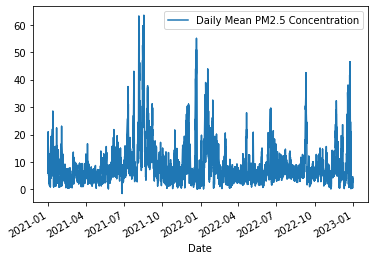

In [11]:
df[["Daily Mean PM2.5 Concentration"]].dropna().plot(kind = "line")

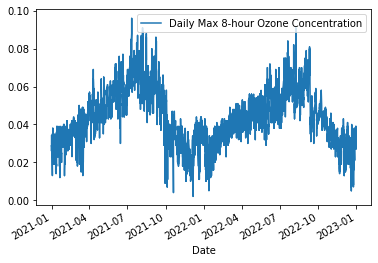

In [12]:
df[["Daily Max 8-hour Ozone Concentration"]].dropna().plot(kind = "line")

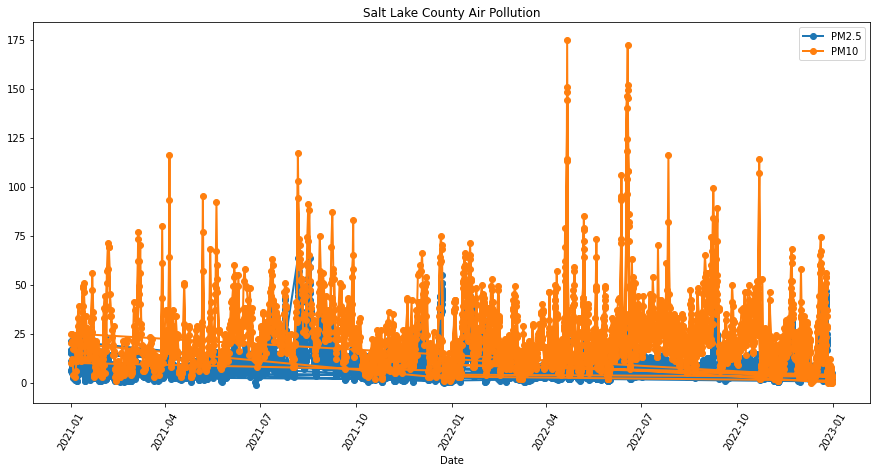

In [13]:
# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[15, 7])

ax.plot(df.index,
         df["Daily Mean PM2.5 Concentration"],
         marker='o', linewidth=2, label='PM2.5')
ax.plot(df.index,
         df["Daily Mean PM10 Concentration"],
         marker='o', linewidth=2, 
         label='PM10')
plt.xticks(rotation=60)
ax.set_xlabel('Date')
ax.set_ylabel(None)
ax.set_title("Salt Lake County Air Pollution")
plt.legend()
plt.show()

In [14]:
fig = make_subplots(rows=3, cols=1, shared_xaxes = True, vertical_spacing=0.02)

df_plot = df[["Daily Mean PM2.5 Concentration", "Daily Mean PM10 Concentration", "Daily Max 8-hour Ozone Concentration"]].groupby(df.index).agg("mean")

fig.add_trace(go.Scatter(x = df_plot.index, y = df_plot["Daily Mean PM2.5 Concentration"], name = "PM2.5", 
                         line=dict(color="crimson"), mode = "markers+lines", hovertemplate="%{y} ug/m^3<br>"),
              row = 1, col = 1)

fig.add_hline(y=12, line_dash="dot", row=1, col=1)

fig.add_trace(go.Scatter(x = df_plot.index, y = df_plot["Daily Mean PM10 Concentration"], name = "PM10",
                        line=dict(color="blue"), mode = "markers+lines",hovertemplate="%{y} ug/m^3<br>"),
              row = 2, col = 1)

fig.add_hline(y=150, line_dash="dot", row=2, col=1)

fig.add_trace(go.Scatter(x = df_plot.index, y = df_plot["Daily Max 8-hour Ozone Concentration"], name = "Ozone",
                        line=dict(color="darkcyan"), mode = "markers+lines", hovertemplate="%{y} ppm<br>"),
              row = 3, col = 1)

fig.add_hline(y=0.07, line_dash="dot", row=3, col=1)

fig.update_xaxes(title = None)
fig.update_yaxes(title = None)

fig.update_layout(showlegend=True,
                 title = "Average Air Pollution in Salt Lake County")

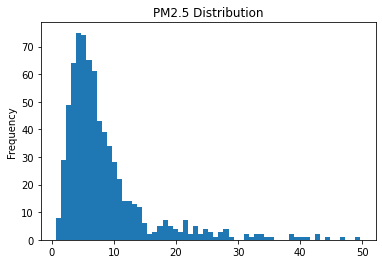

In [25]:
df_plot["Daily Mean PM2.5 Concentration"].plot(kind = "hist", bins = 60, title = "PM2.5 Distribution")

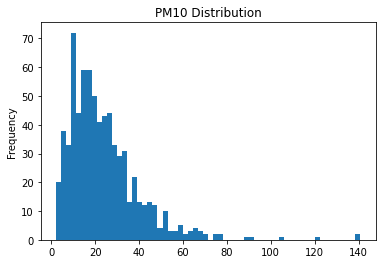

In [26]:
df_plot["Daily Mean PM10 Concentration"].plot(kind = "hist", bins = 60, title = "PM10 Distribution")

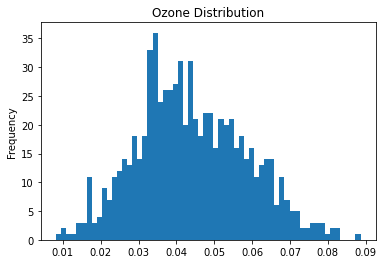

In [27]:
df_plot["Daily Max 8-hour Ozone Concentration"].plot(kind = "hist", bins = 60, title = "Ozone Distribution")

In [15]:
df_plot[df_plot["Daily Mean PM2.5 Concentration"] >= 12]["Daily Mean PM2.5 Concentration"].count()/730 

0.1726027397260274